<a href="https://colab.research.google.com/github/emma-rose22/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


##Preparing the data

In [0]:
import pandas as pd
import numpy as np 
from scipy.stats import ttest_ind 

In [31]:
from google.colab import files
uploaded = files.upload()

Saving house-votes-84.data to house-votes-84 (2).data


In [0]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

In [33]:
df = pd.read_csv('house-votes-84.data', header=None, names= column_headers, na_values= '?')
df.head(11)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,NaN,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,NaN,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,NaN,NaN


In [34]:
df=df.replace({'y':1, 'n':0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
rep = df[df['party']=='republican']
dem = df[df['party'] == 'democrat']

In [0]:
rep = rep.dropna()

In [0]:
dem = dem.dropna()

In [70]:
dem.shape


(124, 17)

##Confidence Intervals

1. Generate and numerically represent a confidence interval

In [0]:
#first I am going to write again the function created in class to find confidence interval
#given data and confidence level 

from scipy import stats

def confidence_interval(data, confidence= .95):

  data= np.array(data)
  #this is creating our estimate
  mean= np.mean(data)
  #this is finding the degrees of freedom
  n= len(data)
  #I don't fully understand what this does, lets talk about it
  stderr= stats.sem(data, ddof=1)/np.sqrt(n)
 
  moe= stderr* stats.t.ppf((1+confidence)/2.0, n-1)
  return (mean - moe, mean, mean + moe)


In [72]:
confidence_interval(dem['water-project'])

(0.44363653049615315, 0.45161290322580644, 0.45958927595545973)

In [0]:
dem_water_project= confidence_interval(dem['water-project'])

In [74]:
confidence_interval(rep['water-project'])

(0.46301597486245033, 0.4722222222222222, 0.4814284695819941)

In [0]:
rep_water_project = confidence_interval(rep['water-project'])

2. Graphically (with a plot) represent the confidence interval

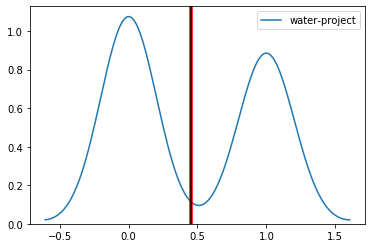

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(dem['water-project'])
CI = dem_water_project
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k');

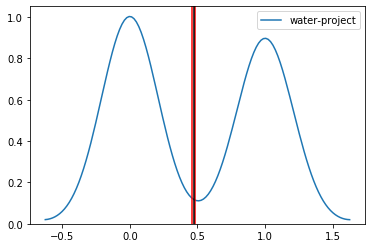

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(rep['water-project'])
CI = rep_water_project
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k');

3. Interpret the confidence interval - what does it tell you about the data and its distribution?

I chose to use the water project bill because it was something that both parties had a split vote on, making for a prettier graph.

You can see the average amount of democrats who voted for this bill is 41.5% with a confidence of interval of 1.6%. This is a better confidence interval than I asked for, meaning that democrats should vote like this 99.4% of the time (if this were actually sample data)

The average number of republicans who voted for this bill was 47.2%, with a confidence interval of 1.8%. Again, this is a better confidence interval than I asked for, meaning that republicans should vote for like this 99.2% of the time.  


### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [82]:
#this is changing continuous variables to catagorical
#by cutting the hours worked into bins
cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,40-49
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,10-19
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,40-49
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,50+
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,40-49


In [83]:
observed = pd.crosstab(df['sex'], df['salary'], margins=True)

observed

salary,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


In [87]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)


print(f'Chi-Squared: {chi_squared}')
print(f'P-value: {p_value}')
print(f'Degrees of Freedom: {dof}')

#We can see that there is no way it is a random coincidence that 
#men earned a higher salary than women in this dataframe. 
#There is literally no chance, the p value is 0 and the 
#chi-squared is very high. 

Chi-Squared: 1518.8868199570722
P-value: 0.0
Degrees of Freedom: 4


###Using Numpy 



In [88]:
observed = pd.crosstab(df['sex'], df['salary'], margins=True)

observed

salary,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


In [91]:
female_salary = observed.iloc[0][0:2].values
female_salary

array([9592, 1179])

In [92]:
male_salary = observed.iloc[1][0:2].values
male_salary

array([15128,  6662])

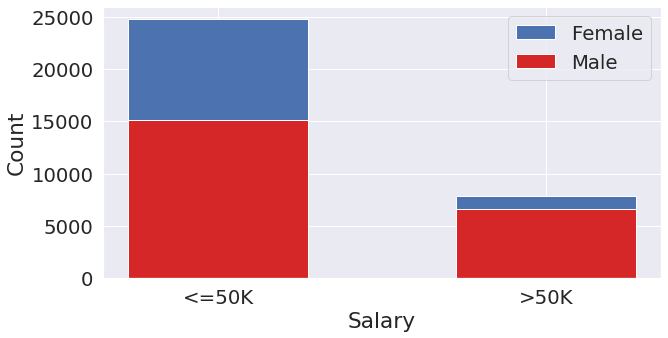

In [97]:
#just taking a peek

fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["<=50K", ">50K"]
p1 = plt.bar(categories, male_salary, 0.55, color='#d62728')
p2 = plt.bar(categories, female_salary, 0.55, bottom=male_salary)
plt.legend((p2[0], p1[0]), ('Female', 'Male'))
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [99]:
#now we are actually beginning the calculation by adding the appropriate values together
row_sums = observed.iloc[0, 0:2].values
col_sums = observed.iloc[1, 0:2].values

print(row_sums)
print(col_sums)

[9592 1179]
[15128  6662]


In [104]:
#here we are getting the total sample size
total = observed.loc['All','All']
total

32561

In [105]:
#now we will find our table of expected values

expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
  
expected = np.array(expected)

print(expected.shape)
print(expected)

(2, 2)
[[4456.49015694 1962.52891496]
 [ 547.76917171  241.22410245]]


In [108]:
observed = pd.crosstab(df['sex'], df['salary']).values

print(observed.shape)
print(observed)



(2, 2)
[[ 9592  1179]
 [15128  6662]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)